In [41]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [42]:
# Sample stock data
data = pd.read_csv('test2 - Sheet1.csv')
# data = pd.read_excel('data - Sheet1.csv', sheet_name='Sheet3')

# Set the 'Stock Name' column as the index
data.set_index('Stock', inplace=True)

data = data.dropna()

print(data)


       1 Month % Return  6 Month % Return  1 Year % Return  % of NVDA MC  \
Stock                                                                      
MRVL               -7.7              36.9             81.7      0.028591   
TSM                 5.1              63.6             59.4      0.333227   
AVGO                0.1              63.9            116.1      0.282136   
MPWR               -8.7              45.3             39.1      0.014227   
AMD               -16.9              65.6             84.1      0.125182   
ASX                10.2              46.4             51.7      0.010909   
QRVO                1.6              22.5             21.1      0.005136   
WKEY               -4.6              43.8             98.2      0.010136   
CEVA               -0.7              19.5            -23.2      0.239773   
NXPI               -2.6              24.3             41.6      0.028091   
MU                 30.9              79.5            118.2      0.062182   
QCOM        

In [43]:
# Transpose the data before scaling
scaled_data = preprocessing.scale(data)

# Perform PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

contributions = pca.components_[0] ** 2
# Iterate over the columns of the DataFrame and print feature names and their contributions
for feature, contribution in zip(data.columns, contributions):
    print(f"{feature}: {contribution}")


1 Month % Return: 0.1844529039573832
6 Month % Return: 0.30936881215454237
1 Year % Return: 0.2879813066191501
% of NVDA MC: 0.0018078619451403653
Correlation: 0.09248617480096968
Beta: 0.03275997405307754
Average 10 day vol: 0.01804314137409568
Average vol: 0.02365430910388044
Average 10 Day / Average Vol: 0.049445515991760156


In [44]:
eigenvalues = pca.explained_variance_
# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)           

# Get the eigenvectors (principal axes) from the fitted PCA model
eigenvectors = pca.components_
# Print the eigenvectors
print("Eigenvectors:")
print(eigenvectors)



Eigenvalues:
[2.70870805 2.22324602 1.16200705]
Eigenvectors:
[[-0.42947981 -0.55620932 -0.5366389   0.04251896 -0.3041154  -0.18099717
   0.13432476  0.15379957 -0.22236348]
 [-0.14513904  0.14661952  0.21276714 -0.13788942  0.27405373 -0.13530413
   0.63350856  0.62675346 -0.07475547]
 [ 0.01289609  0.16433653 -0.0390941   0.76245538 -0.12667868  0.51633839
   0.12985619  0.15007662 -0.26061889]]


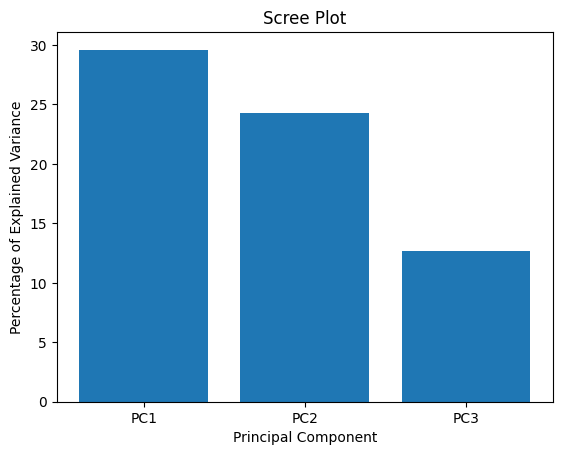

In [45]:
# making PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [46]:
# mine data for the past 10 years for diff sympathy trades
# according to this, i have my 3 most important factors
# which of these 100 othe stocks should i buy then to profit?
# pick stocks based off these factors now 
# simplifying how i pick the stocks now 
# stock 1: i know the values for my important features
# thru PCA i know which features are important and how important 
# multiply the eigen vector by the IRL values and choose the highest value 